 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
Path.cwd()

WindowsPath('C:/Users/mjalm/Bootcamp/week_04/homework/Starter_Code')

In [3]:
# Reading whale returns
WHdata = Path("../Starter_Code/Resources/whale_returns.csv")
WHdata_df = pd.read_csv(WHdata) 
WHdata_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
WHdata_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
WHdata_df = WHdata_df.dropna()
#WHdata_df['Date'] = pd.to_datetime(WHdata_df['Date'])
#WHdata_df

In [6]:
WHdata_df.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [7]:
WHdata_df['Date'] = pd.to_datetime(WHdata_df['Date'])
WHdata_df.dtypes

Date                           datetime64[ns]
SOROS FUND MANAGEMENT LLC             float64
PAULSON & CO.INC.                     float64
TIGER GLOBAL MANAGEMENT LLC           float64
BERKSHIRE HATHAWAY INC                float64
dtype: object

In [8]:
WHdata_df.set_index(pd.to_datetime(WHdata_df['Date'], infer_datetime_format=True), inplace=True)
WHdata_df.drop(columns=['Date'], inplace=True)
WHdata_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns
Algoreturns_data = Path("../Starter_Code/Resources/algo_returns.csv")
Algoreturns_df = pd.read_csv(Algoreturns_data) 
Algoreturns_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [10]:
# Count nulls
Algoreturns_df.isnull().sum()
Algoreturns_df

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [11]:
# Drop nulls
Algoreturns_df = Algoreturns_df.dropna()

In [12]:
Algoreturns_df.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [13]:
Algoreturns_df['Date'] = pd.to_datetime(Algoreturns_df['Date'])
Algoreturns_df.dtypes

C:\Users\mjalm\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Date      datetime64[ns]
Algo 1           float64
Algo 2           float64
dtype: object

In [14]:
Algoreturns_df.set_index(pd.to_datetime(Algoreturns_df['Date'], infer_datetime_format=True), inplace=True)
Algoreturns_df.drop(columns=['Date'], inplace=True)
Algoreturns_df.head()

C:\Users\mjalm\anaconda3\envs\alpacaenv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [15]:
# Reading S&P 500 Closing Prices

SP500_data = Path("../Starter_Code/Resources/sp500_history.csv")
SP500_df = pd.read_csv(SP500_data) 
SP500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [16]:
# Check Data Types
SP500_df.dtypes

Date     object
Close    object
dtype: object

In [17]:
# Fix Data Types
SP500_df['Date'] = pd.to_datetime(SP500_df["Date"])
SP500_df['Date'].dtype

dtype('<M8[ns]')

In [18]:
SP500_df['Date'].dt.strftime('%Y-%m-%d')
SP500_df['Date'].dtype

dtype('<M8[ns]')

In [19]:
SP500_df['Close'] = SP500_df['Close'].str.replace('$', '')
SP500_df['Close']
SP500_df['Close'] = SP500_df['Close'].astype('float')
SP500_df['Close'].dtype

C:\Users\mjalm\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


dtype('float64')

In [20]:
SP500_df.head()

,Date,Close
0,2019-04-23,2933.68
1,2019-04-22,2907.97
2,2019-04-18,2905.03
3,2019-04-17,2900.45
4,2019-04-16,2907.06


In [21]:
SP500_df = SP500_df.sort_values('Date')

In [22]:
SP500_df.set_index(pd.to_datetime(SP500_df['Date'], infer_datetime_format=True), inplace=True)
SP500_df.drop(columns=['Date'], inplace=True)
SP500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [23]:
# Calculate Daily Returns
SP500_df['sp500_daily_return']= SP500_df['Close'].pct_change()
SP500_df['sp500_daily_return'].head()

Date
2012-10-01         NaN
2012-10-02    0.000872
2012-10-03    0.003624
2012-10-04    0.007174
2012-10-05   -0.000322
Name: sp500_daily_return, dtype: float64

In [24]:
# Drop nulls
SP500_df['sp500_daily_return'].isnull().sum()
SP500_df['sp500_daily_return'] = SP500_df['sp500_daily_return'].dropna() 

In [25]:
SP500_df.dropna()

,Close,sp500_daily_return
Date,,
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322
2012-10-08,1455.88,-0.003457
...,...,...
2019-04-16,2907.06,0.000509
2019-04-17,2900.45,-0.002274
2019-04-18,2905.03,0.001579


In [26]:
# Rename `Close` Column to be specific to this portfolio.
SP500_df = SP500_df.rename(columns={'sp500_daily_return': 'S&P 500'})
SP500_df.drop(columns=['Close'], inplace=True)

SP500_df.rename(columns = {'Close': 'SP500_Close'}, inplace= True)
SP500_df.head()

## Combine Whale, Algorithmic, and S&P 500 Returns

In [27]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([WHdata_df, Algoreturns_df, SP500_df], axis= 'columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [28]:
# Plot daily returns of all portfolios
combined_df.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.000177,-0.000214,-0.000083,0.000506,0.000662,0.000263,0.000349
std,0.007895,0.007023,0.010894,0.012919,0.007620,0.008342,0.008554
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.040979
25%,-0.003638,-0.004042,-0.004790,-0.005634,-0.003252,-0.003794,-0.002881
50%,0.000518,0.000000,0.000320,0.000735,0.000069,0.000703,0.000419
75%,0.004328,0.003626,0.005285,0.007619,0.003908,0.005253,0.004471
max,0.042977,0.029338,0.080705,0.061341,0.050735,0.030822,0.049594


<AxesSubplot:title={'center':'Combined Portfolio Daily Returns'}, xlabel='Date'>

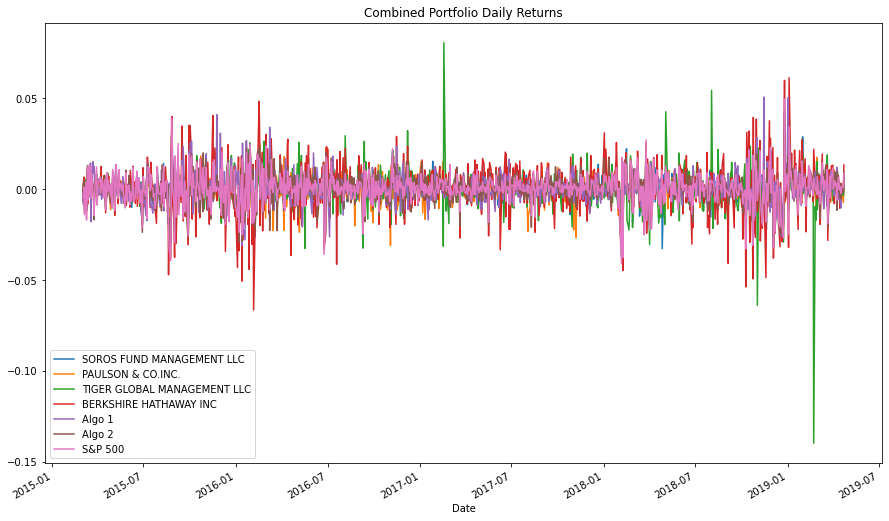

In [29]:
combined_df.plot(figsize=(15, 9), title= 'Combined Portfolio Daily Returns')

In [30]:
combined_df.isnull().sum()
#combined_df.dropna()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
dtype: int64

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns all Portfolios'}, xlabel='Date'>

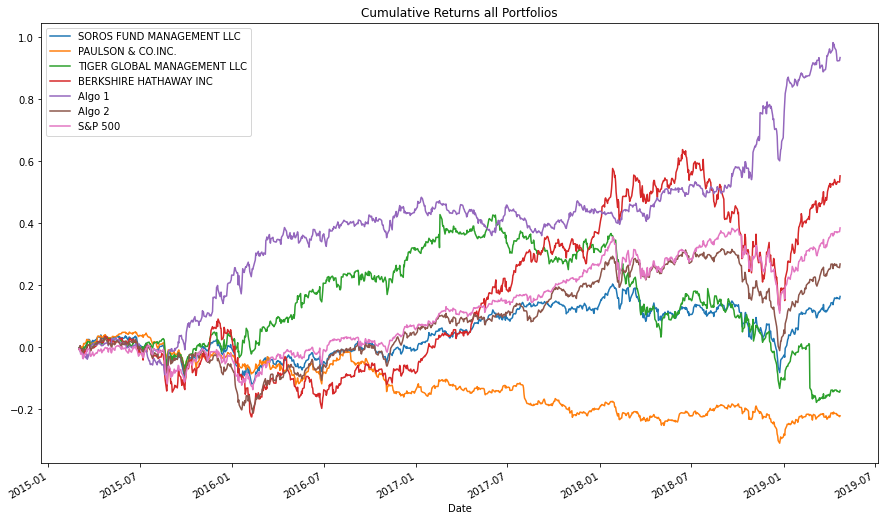

In [31]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns

# Plot cumulative returns
cumulative_returns.plot(figsize=(15,9), title="Cumulative Returns all Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Cumulative Returns'}>

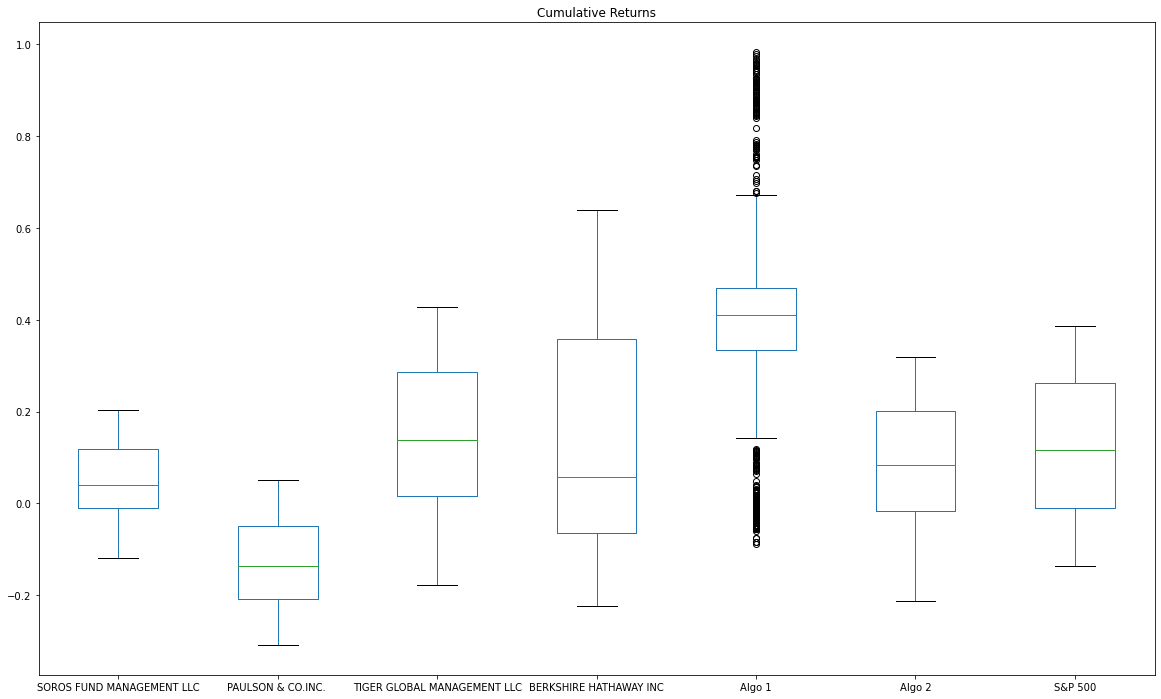

In [32]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize=(20,12), title= 'Cumulative Returns')

### Calculate Standard Deviations

In [33]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = combined_df.std()
all_portfolio_std = all_portfolio_std.sort_values(ascending=False)
all_portfolio_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [34]:
# Calculate  the daily standard deviation of S&P 500
SP_daily_std = combined_df['S&P 500'].std()
SP_daily_std 

0.008553731597758204

#### Determine which portfolios are riskier than the S&P 500
##### As shown from the box plot chart and standard deviation of all portfolios, Paulson & Co. Inc, Algo 2, Berkshire Hathaway Inc and Tiger Global Management LCC are riskier than S&P 500

### Calculate the Annualized Standard Deviation

In [35]:
# Calculate the annualized standard deviation (252 trading days)
combined_std_annual = combined_df.std() * np.sqrt(252)
combined_std_annual

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21 Days'}, xlabel='Date'>

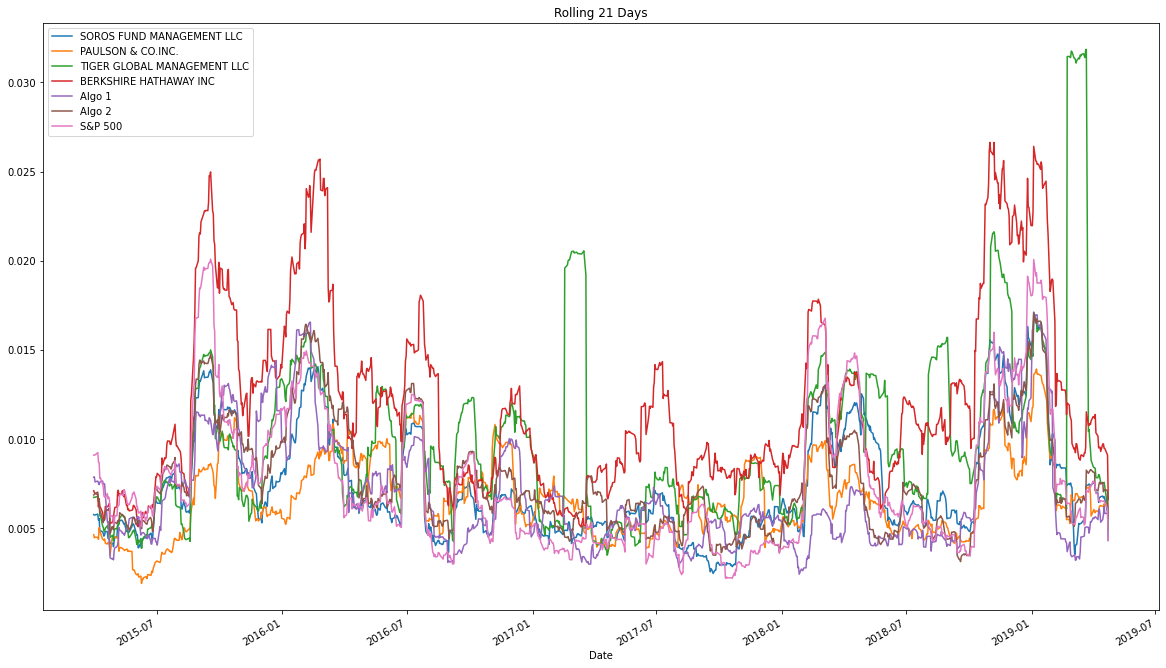

In [36]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_std_21 = combined_df.rolling(window=21).std()
combined_std_21.isnull().sum()
combined_std_21.dropna()
# Plot the rolling standard deviation
combined_std_21.plot(figsize=(20,12), title= "Rolling 21 Days")

### Calculate and plot the correlation

<AxesSubplot:>

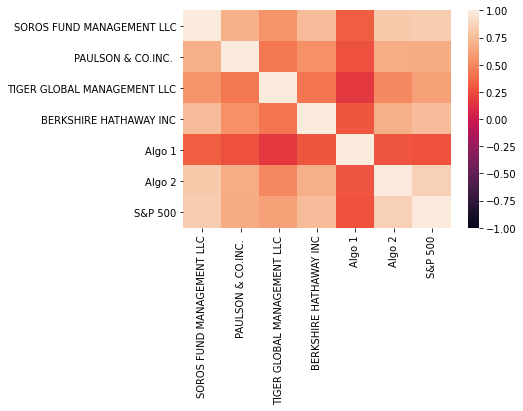

In [37]:
# Calculate the correlation
correlation = combined_df.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [38]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [39]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Annualized Sharpe Ratios


In [41]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [42]:
# Reading data from 1st stock


In [43]:
# Reading data from 2nd stock


In [44]:
# Reading data from 3rd stock


In [45]:
# Combine all stocks in a single DataFrame


In [46]:
# Reset Date index


In [47]:
# Reorganize portfolio data by having a column per symbol


In [48]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [49]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [50]:
# Join your returns DataFrame to the original returns DataFrame


In [51]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [52]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [53]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [54]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [55]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [56]:
# Calculate Annualzied Sharpe Ratios


In [57]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!